# Problem Set 3- Question 2:
By Preethi Susan Abraham

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def genMortality(n):
    # Generate COVID-19 deaths for different ages and comorbidity groups
    # Baseline mortality rate
    benchProb = 0.0005
    # These are multiplyers from the base probability of death
    # Note:  These numbers are real, and come from the US CDC
    multiplyers = np.array([0.1,1./16.,1.,4.,10.,30.,90.,220.,630.])
    # Age group means corresponding to the multipliers
    ageMean     = np.array([2.,10.,25.,35.,45.,57.,70.,80.,95.])
    # Probability of death for different age groups
    ageGroupProbs = benchProb*multiplyers
    # generate data
    ageGroup = np.random.randint(low=0,high=9,size=n)
    # This is totally made up by me
    # These are the number of other medical conditions you might have
    # Known as comorbities (assume 0 to 3)
    comorb   = np.random.randint(low=0,high=4,size=n)
    # Function to multiple death probs by for comorb
    # totally made up by me
    # Note:  We will change this line eventually
    comorbm  = 1.*(comorb==0)+2.0*(comorb==1)+2.0*(comorb==2)+4.0*(comorb==3)
    # Xp is prob of death
    Xp = comorbm*ageGroupProbs[ageGroup]
    Xp = np.minimum(Xp,1.)
    # Age vector
    Xvec = ageMean[ageGroup]+np.random.uniform(low=-2.,high=2.,size=n)
    # Target is 0 alive, 1 dead
    y = (np.random.uniform(low=0.,high=1.,size=n)<Xp)
    # Set predictors to age, and comorbidity
    X = np.zeros( (n,2))
    X[:,0] = Xvec
    X[:,1] = comorb
    # also return the ageGroup for ease of use
    return X,y,ageGroup

In [3]:
# This is my monte-carlo test/train function
# Generate many test/train splits
# A monte-carlo for cross validation
# This is how we should measure performance
# Note:  This will work with any model
def MCtraintest(nmc,X,y,modelObj,testFrac):
    # Create memory space for monte-carlo runs
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

In [4]:
# Generate data
# Extra lines enable reducing the data to certain (older) age groups
Xraw,yraw, ageGroup = genMortality(100000)
X = Xraw[ageGroup>=0,:].copy()
y = yraw[ageGroup>=0].copy()
# These might be useful to have around
ageMean     = np.array([2.,10.,25.,35.,45.,57.,70.,80.,95.])
benchProb = 0.0005
multiplyers = np.array([0.1,1./16.,1.,4.,10.,30.,90.,220.,630.])
pTrue = benchProb*multiplyers

In [5]:
for i in range(9):
    print(ageMean[i],np.mean(y[ageGroup==i]))

2.0 0.0
10.0 9.149130832570906e-05
25.0 0.0007228697930785217
35.0 0.004865741575058569
45.0 0.010614170371042366
57.0 0.03380923184724534
70.0 0.10096631445859297
80.0 0.25193519351935195
95.0 0.6394235072956763


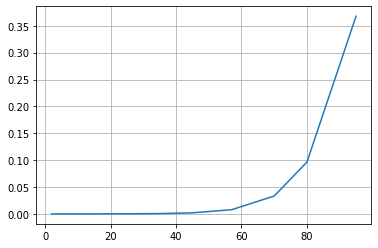

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)

# set up plotting array with set of age means for x-axis
ageMean     = np.array([2.,10.,25.,35.,45.,57.,70.,80.,95.])
Xplt = np.zeros((len(ageMean),2))
Xplt[:,0] = ageMean
# Column 2 get comorbidities : Try zero as first pass on these
Xplt[:,1] = np.zeros(len(ageMean))

# Now get the predicted probability of death for ages and comorbidities
pp = lr.predict_proba(Xplt)
# Plot these
# Note:  pp values returned have pp[:,0] as prob of y=0, and pp[:,1]
# for prob y = 1
plt.plot(ageMean,pp[:,1])
plt.grid()

# You should now try this by changing the values in column 2 of 
# Xplt to the various comorbidities [0,1,2,3]
# Plot all 4 of these lines on the same plot to show how it changes
#  Note:  You should be able to set up a nice legend for [0,1,2,3]
#  using, plt.plot(agentMean,pp[:,1],label=i) where i = comorbidity

# 2. This assignment asks you to use a data simulator function which generates simulated outcomes for many COVID-19 patients.  The target variable is 0 (lived) and 1 (died) for the various patients.  It generates a set of two predictor variables which represent age, and the number of comorbidities (other diseases) that people have which may lead to more severe cases.

a) Generate 100000 data points for this data set.  Estimated a logistic regression, and use a randomized test/train split monte-carlo (see function for this) to estimate both train and test set accuracy.  Use 100 length monte-carlo, and  50/50 train/test split.  Report these values.  Also, report the mean for your target, y in the full sample.  Does this give you a benchmark Naive model value?  How close are you to this?

In [7]:
Xraw,yraw, ageGroup = genMortality(100000)
X = Xraw[ageGroup>=0,:].copy()
y = yraw[ageGroup>=0].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)
print('R squared value for training data (Logistic Regression)=',lr.score(X_train,y_train))
print('R squared value for test data (Logistic Regression)=',lr.score(X_test,y_test))

R squared value for training data (Logistic Regression)= 0.9266
R squared value for test data (Logistic Regression)= 0.92484


In [9]:
#Monte Carlo Simulation
trainS, testS = MCtraintest(100,X,y,lr,0.5)
print('Train set accuracy (Monte Carlo)=',np.mean(trainS))
print('Test set accuracy (Monte Carlo)=',np.mean(testS))
print('Mean of the target=',np.mean(y))

#The monte carlo simulation accuracy values for the training and testing data are very close to that of the logistic regression model

Train set accuracy (Monte Carlo)= 0.9260035999999999
Test set accuracy (Monte Carlo)= 0.9260054000000001
Mean of the target= 0.11591


b) Generate a single 50/50 train/test split.  Estimate the same model on the training data.  For the test data set report:  a) the confusion matrix, b) precision, c) recall.  To do this you will need a predictor for y_test.  This is easy to get once you have done a lr.fit(X_train).  (Assume lr is your logistic regression object.)  After this you can get y_test_pred = lr.predict(X_test) to get predictors for your test data.  With this and y_test you should be ready to go to use the scikit-learn confusion matrix function. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# a) Confusion Matrix

from sklearn.metrics import confusion_matrix
y_test_pred = lr.predict(X_test)
cmat = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cmat.ravel()
print('Confusion Matrix:\n')
print(cmat)

Confusion Matrix:

[[42942  1343]
 [ 2342  3373]]


In [12]:
# b) Precision

precision = tp/(tp+fp)
print("Precision:",precision)

# c) Recall
recall = tp/(tp+fn)
print("Recall:",recall)

Precision: 0.7152247667514843
Recall: 0.5902012248468942


c) Split your data into a single test/train split.  Now use the predict_proba() method to predict the probability of death for the different ages, and the comorbidities.  Generate a nice plot showing the probabilities plotted across ages (x-axis) and probabilities (y-axis), using a different line for each comorbidity.  I have put some extensive hints into the starter code for how to get started with this.  It shows how to plot one of these lines (comorbidity = 0).  From this is should be easy to do this for all of [0,1,2,3], and set up a nice legend and labels on the plot.  See the starter file for more info!

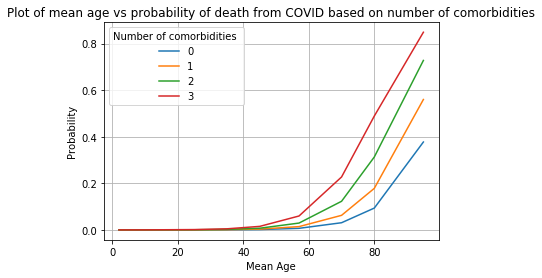

In [13]:
comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = lr.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

d) Now try a KNN classifier for classification.  Repeat step (1) above, but you should now try 4 different values for the neighbors, 5, 10, 25, 50.  Report the mean test accuracy for each, and use this to decide on your best model.  How does the logistic compare with the nearest neighbor model?

For neighbors=5:

R squared value for Training Data 0.93756
R squared value for Testing Data 0.91744


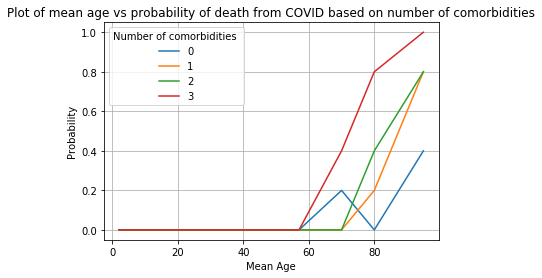

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

#For 5 Neigbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print('For neighbors=5:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

For neighbors=10:

R squared value for Training Data 0.93108
R squared value for Testing Data 0.92172


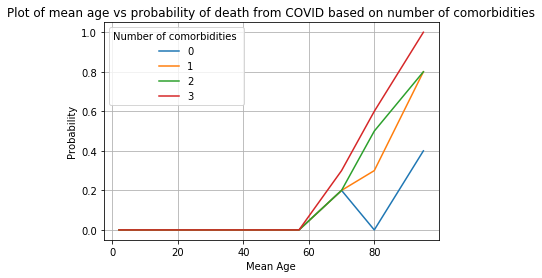

In [15]:
#For 10 Neigbours
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print('For neighbors=10:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

For neighbors=25:

R squared value for Training Data 0.92772
R squared value for Testing Data 0.92486


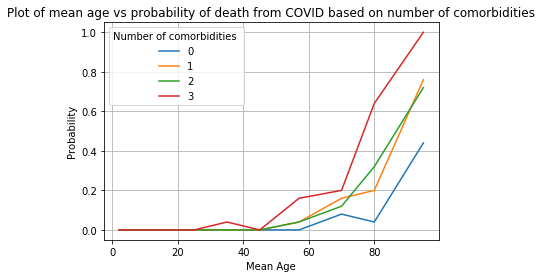

In [16]:
#For 25 Neigbours
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print('For neighbors=25:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

In [17]:
#For 50 Neigbours
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
print('For neighbors=50:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

For neighbors=50:

R squared value for Training Data 0.92678
R squared value for Testing Data 0.92638


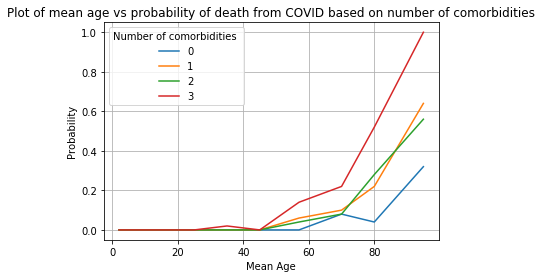

In [18]:
#for knn=50
comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)
    
#The KNN model is slightly better than the logistic regression model. This is because the scores which we obtain from the KNN -
#classifier are slightly higher than that of logistic regression.

e) Now change the structure of the data generator.  Change the line which reads

    comorbm  = 1.*(comorb==0)+2.0*(comorb==1)+2.0*(comorb==2)+4.0*(comorb==3)

to

    comorbm  = 1.*(comorb==0)+2.0*(comorb==1)+0.5*(comorb==2)+4.0*(comorb==3)

There is some kind of medical miracle here which means you are better off with 2 comorb for some strange reason. Rerun the logistic regression in the randomized cross validation as before, and report the mean test accuracy.

In [19]:
def genMortality_new(n):
    benchProb = 0.0005
    multiplyers = np.array([0.1,1./16.,1.,4.,10.,30.,90.,220.,630.])
    ageMean     = np.array([2.,10.,25.,35.,45.,57.,70.,80.,95.])
    ageGroupProbs = benchProb*multiplyers
    ageGroup = np.random.randint(low=0,high=9,size=n)
    comorb   = np.random.randint(low=0,high=4,size=n)
    #CHANGING THE LINE BELOW:
    comorbm  = 1.*(comorb==0)+2.0*(comorb==1)+0.5*(comorb==2)+4.0*(comorb==3)
    # Xp is prob of death
    Xp = comorbm*ageGroupProbs[ageGroup]
    Xp = np.minimum(Xp,1.)
    # Age vector
    Xvec = ageMean[ageGroup]+np.random.uniform(low=-2.,high=2.,size=n)
    # Target is 0 alive, 1 dead
    y = (np.random.uniform(low=0.,high=1.,size=n)<Xp)
    # Set predictors to age, and comorbidity
    X = np.zeros( (n,2))
    X[:,0] = Xvec
    X[:,1] = comorb
    # also return the ageGroup for ease of use
    return X,y,ageGroup

In [20]:
Xraw,yraw, ageGroup = genMortality_new(100000)
X = Xraw[ageGroup>=0,:].copy()
y = yraw[ageGroup>=0].copy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)
print('With the new data generator function:\n')
print('R squared value for training data (Logistic Regression)=',lr.score(X_train,y_train))
print('R squared value for test data (Logistic Regression)=',lr.score(X_test,y_test))

With the new data generator function:

R squared value for training data (Logistic Regression)= 0.91626
R squared value for test data (Logistic Regression)= 0.91438


f) Repeat the plot you did before with the probabilities, from part (3).  Is there anything a little strange about the plot?

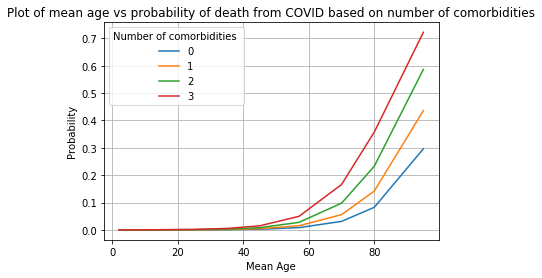

In [22]:
comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = lr.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)
    
#The probability of deaths based on different number of comorbidities has reduced sligtly compared to the first graph.
#Eg: In the previous graph, for patients with 3 comorbidities, the probablity of death was greater than 0.8
#But in the new graph, the probabbilty of death for number of comorbidities as 3 is lower(approx 0.7)

g) Now repeat your work with the KNN classifier from part (3) on this new data set.  Report the best model, and the mean test accuracy for this model.  How is it doing now in relation to the logistic model?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

#For 5 Neigbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print('For neighbors=5:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

For neighbors=5:

R squared value for Training Data 0.9476
R squared value for Testing Data 0.93196


In [24]:
#For 10 Neigbours
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print('For neighbors=10:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

For neighbors=10:

R squared value for Training Data 0.94448
R squared value for Testing Data 0.93596


In [25]:
#For 25 Neigbours
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print('For neighbors=25:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

For neighbors=25:

R squared value for Training Data 0.94234
R squared value for Testing Data 0.93764


In [26]:
#For 50 Neigbours
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
print('For neighbors=50:\n')
print('R squared value for Training Data',knn.score(X_train,y_train))
print('R squared value for Testing Data',knn.score(X_test, y_test))

#The knn with neigbors=50 seems to be the best model
#This is because the R squared value for the test data is the highest for the model where knn neighbors=50

#In comparison with the logistic regression model, knn is doing much better since the scores for training and testing are higher for knn compared to logistic model

For neighbors=50:

R squared value for Training Data 0.94108
R squared value for Testing Data 0.9388


h) Repeat the probability plot for the KNN classifier.  Do the lines make more sense than in (6)?

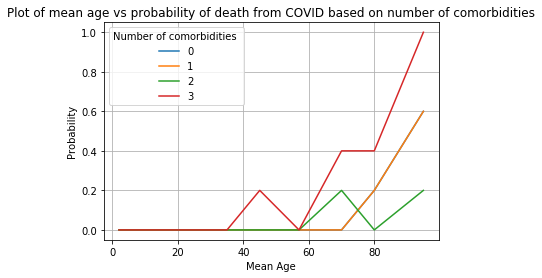

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

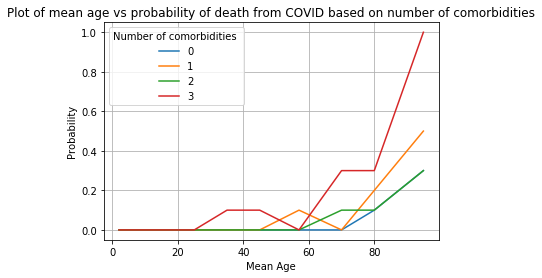

In [28]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

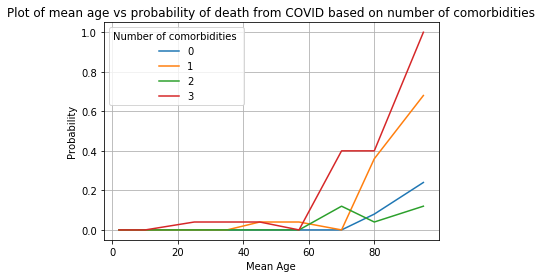

In [29]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)

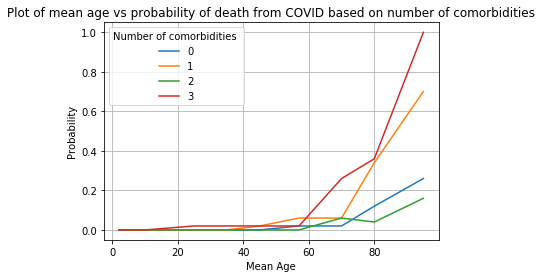

In [30]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)

comorbidity=[0,1,2,3]
for i in comorbidity:
    Xplt[:,1]=[comorbidity[i]]*len(ageMean)
    pp = knn.predict_proba(Xplt)
    plt.plot(ageMean,pp[:,1],label=i)
    plt.xlabel('Mean Age')
    plt.ylabel('Probability')
    plt.title('Plot of mean age vs probability of death from COVID based on number of comorbidities')
    plt.legend(title='Number of comorbidities ')
    plt.grid(True)
    
    #The plots for the logistic regression make better sense compared to the knn model.In the knn model, if we look at the line
    #which represents the number of comorbidities as 3, there is a sudden fall in the value. However, in the logistic regression
    #model, it can be seen that there is a gradual increase in the probability of death as the mean age increase. There are no 
    #sudden peaks or falls in the graphs for logistic regression.